In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.helper import plot
from datetime import datetime
import scipy
sns.set()

In [149]:
N = 1000
L = 80

X0 = [[0, 4*i/(L/4)] for i in range(np.int32(L/4))]
X0 += [[2*i/(L/8), 0] for i in range(np.int32(L/8))]
X0 += [[2*i/(L/8), 4] for i in range(np.int32(L/8))]

X0 += [[4, 4*i/(L/4)] for i in range(np.int32(L/4))]
X0 += [[2 + 2*i/(L/8), 0] for i in range(np.int32(L/8))]
X0 += [[2 + 2*i/(L/8), 4] for i in range(np.int32(L/8))]

Y0 = [0 for i in range(np.int32(L/2))]
Y0 += [1 for i in range(np.int32(L/2))]
Y0 = np.array(Y0)

## Generate X Data
X1 = [[random.random()*4, random.random()*4] for i in range(np.int32(N))]

len(X0)

80

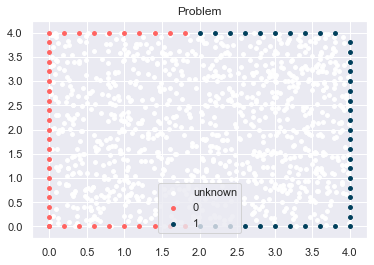

In [150]:
X = X0 + X1
plot(X0,Y0,X)

In [154]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def weight_func(xi, xj, sigm):
    xixj = xi - xj
    xixj2 = np.dot(xixj, xixj)
    w = np.float16(np.exp(-(xixj2)/(sigm**2)))
    w = w if w>1E-3 else 0
    return w

def conjugate_grad(A, b, x=None):
    n = len(b)
    x = np.ones(n)
    r = b - np.dot(A, x)
    p = r
    for k in range(n):
        alpha = np.dot(r,r) / (np.dot(np.dot(p.T,A),p))
        x = x + np.dot(alpha,p)
        r = r - np.dot(np.dot(alpha,A),p)
        if np.dot(r,r) < 1e-5:
            print("residual", np.dot(r,r), "iteration", k)
            break
        betha = np.dot(r,r) / np.dot(p,p)
        p = r + np.dot(betha, p)
    return x

In [155]:
sigma = 0.3
## VARIABLE HELPER
X = np.array(X0 + X1)
Nl = len(X0)
N = len(X)

W = []
for i,x in enumerate(X):
    w = [weight_func(X[i], X[j], sigma) if i!=j else 0 for j in range(len(X))]
    W.append(w)
W = np.array(W)

A = []
for i in range(Nl,N):
    a = [(-np.sum(W[i]) if i==j else W[i][j]) for j in range(Nl,N)]
    A.append(a)
A = np.array(A)

## Create b
b = np.array([-np.sum([w*Y0[j] if j<Nl else 0 for j,w in enumerate(W[i])]) for i in range(Nl,N)])

residual 9.06653368275508e-06 iteration 70
0.02014810903698653 0.982420140077279


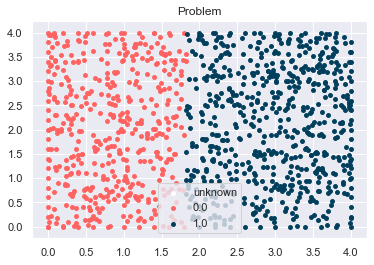

0:00:00.930559


In [156]:
start=datetime.now()

U = conjugate_grad(A,b)
Y = list(Y0*1.0) + [np.abs(np.round(x,0)) for x in U]
print(min(U), max(U))
plot(X,Y,[])

print(datetime.now() - start)

0.020121551796537473 0.9823894722445247


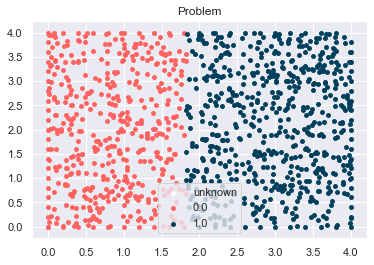

0:00:00.339760


In [157]:
start=datetime.now()

U = scipy.sparse.linalg.cg(A,b)[0]
Y = list(Y0*1.0) + [np.round(x,0) for x in U]
print(min(U), max(U))
plot(X,Y,[])

print(datetime.now() - start)

0.020122518069642298 0.9823912489444813


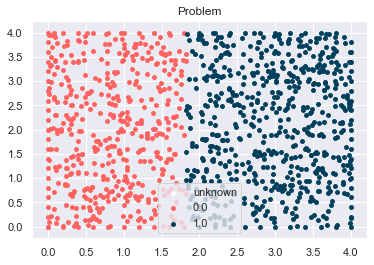

0:00:00.328703


In [158]:
start=datetime.now()

U = np.linalg.solve(A,b)
Y = list(Y0*1.0) + [np.round(x,0) for x in U]
print(min(U), max(U))
plot(X,Y,[])

print(datetime.now() - start)

In [76]:
sigma = 0.3
## VARIABLE HELPER
X = np.array(X0 + X1)
Nl = len(X0)
N = len(X)

W = []
for i,x in enumerate(X):
    w = [weight_func(X[i], X[j], sigma) if i!=j else 0 for j in range(len(X))]
    W.append(w)
W = np.array(W)

A = []
for i,x in enumerate(X):
    if i < Nl:
        a = [1 if i==j else 0 for j in range(len(X))]
    else:
        a = [-np.sum(W[i]) if i==j else W[i][j] for j in range(len(X))]
    A.append(a)
A = np.array(A)

## Create b
b = np.array([Y0[i] if i<Nl else 0 for i in range(N)])

0.0 1.0


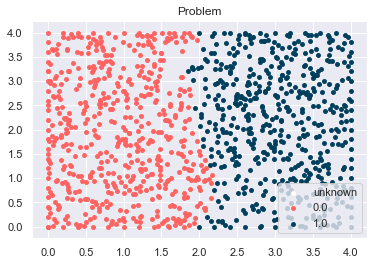

0:00:00.365760


In [77]:
start=datetime.now()

U = np.linalg.solve(A,b)
Y = [np.round(x,0) for x in U]
print(min(U), max(U))
plot(X,Y,[])

print(datetime.now() - start)